Link do vídeo: https://gvmail-my.sharepoint.com/:v:/g/personal/c378337_fgv_edu_br/EdEJDLcAmMFNgD2G5qWZgZQBlqyQApPhycGcrAXIp3AonA?e=tazMCg&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJTdHJlYW1XZWJBcHAiLCJyZWZlcnJhbFZpZXciOiJTaGFyZURpYWxvZy1MaW5rIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXcifX0%3D

## 1. Introdução

Este conjunto de dados (https://www.kaggle.com/datasets/nliabzd/movies-imdb-and-bechdel-information/data) cobre informações sobre 9689 filmes, como títulos, gêneros, classificações no IMDb e pontuações no teste de Bechdel. Os dados foram coletados em abril de 2024. As datas de lançamento dos filmes vão de 1894 ao início de 2024. O teste foi inventado em 1985 por Alison Bechdel e
consiste na medida da representação feminina no cinema. Para passar no teste, o filme deve ter pelo menos duas mulheres citadas nele (pontuação 1 no teste, 0 caso contrário) que conversam entre si (pontuação 2) sobre qualquer outra coisa do que um homem (pontuação 3).

-Perguntas a serem respondidas:

Será que quanto mais bem avaliado um filme, maior sua pontuação no teste de Bechdel?

Será que filmes mais recentes têm maior pontuação no teste de Bechdel que os mais antigos?

A representação das mulheres é proporcional à duração do filme?

Os filmes de ficção científica e terror são mais sexistas?

## 2. Importação de bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

## 3. Carga dos dados

In [2]:
df = pd.read_csv('Bechdel_IMDB_Merge.csv')
df.head()

,title,year,imdbid,id,bechdelRating,imdbAverageRating,numVotes,runtimeMinutes,genre1,genre2,genre3
0,Miss Jerry,1894,9,9779,0,5.3,210.0,45,Romance,NaN,NaN
1,"Story of the Kelly Gang, The",1906,574,1349,1,6.0,882.0,70,Action,Adventure,Biography
2,Cleopatra,1912,2101,2003,2,5.1,619.0,100,Drama,History,NaN
3,A Florida Enchantment,1914,3973,4457,2,5.8,299.0,63,Comedy,NaN,NaN
4,"Birth of a Nation, The",1915,4972,1258,2,6.1,26282.0,195,Drama,History,War


# Descrição das colunas:

title: Nome do filme

year: Ano de lançamento do filme

imdbid: ID no IMDB

id: ID no site bechdeltest.com

bechdelRating: Pontuação de Bechdel, de 0 a 3. (0 significa que há menos de duas mulheres, 1 significa que elas não se falam, 2 significa que falam de um homem, 3 significa que passou no teste)

imdbAverageRating: Pontuação no IMDB (0 a 10)

numVotes: Número de votos no IMDB

runtimeMinutes: Duração do filme em minutos

genre1: O gênero mais associado ao filme

genre2: O segundo gênero mais associado ao filme

genre3: O terceiro gênero mais associado ao filme

In [3]:
df.describe()

,year,imdbid,id,bechdelRating,imdbAverageRating,numVotes
count,9689.000000,9.689000e+03,9689.000000,9689.000000,9689.000000,9.689000e+03
mean,1997.730106,1.880545e+06,5402.708019,2.164929,6.558747,8.866075e+04
std,22.601599,3.185806e+06,3210.085979,1.072825,0.998028,1.817951e+05
min,1894.000000,9.000000e+00,2.000000,0.000000,1.200000,9.000000e+00
25%,1989.000000,9.806300e+04,2586.000000,1.000000,6.000000,5.166000e+03
50%,2006.000000,4.384880e+05,5334.000000,3.000000,6.700000,2.385700e+04
75%,2014.000000,2.098627e+06,8118.000000,3.000000,7.300000,9.186300e+04
max,2024.000000,3.112232e+07,11280.000000,3.000000,9.300000,2.878238e+06


In [4]:
df.dtypes

title                 object
year                   int64
imdbid                 int64
id                     int64
bechdelRating          int64
imdbAverageRating    float64
numVotes             float64
runtimeMinutes        object
genre1                object
genre2                object
genre3                object
dtype: object

## 4. Manipulação dos dados (limpeza e descrição por tabelas)

In [5]:
df['runtimeMinutes']=pd.to_numeric(df['runtimeMinutes'].replace(r'\N','0'))
df.head()

,title,year,imdbid,id,bechdelRating,imdbAverageRating,numVotes,runtimeMinutes,genre1,genre2,genre3
0,Miss Jerry,1894,9,9779,0,5.3,210.0,45.0,Romance,NaN,NaN
1,"Story of the Kelly Gang, The",1906,574,1349,1,6.0,882.0,70.0,Action,Adventure,Biography
2,Cleopatra,1912,2101,2003,2,5.1,619.0,100.0,Drama,History,NaN
3,A Florida Enchantment,1914,3973,4457,2,5.8,299.0,63.0,Comedy,NaN,NaN
4,"Birth of a Nation, The",1915,4972,1258,2,6.1,26282.0,195.0,Drama,History,War


In [6]:
df.sort_values(by=['imdbAverageRating'], ascending=False).head(10)

,title,year,imdbid,id,bechdelRating,imdbAverageRating,numVotes,runtimeMinutes,genre1,genre2,genre3
2941,"Shawshank Redemption, The",1994,111161,339,0,9.3,2878238.0,142.0,Drama,NaN,NaN
1433,"Godfather, The",1972,68646,2224,2,9.2,2004559.0,175.0,Crime,Drama,NaN
5250,"Dark Knight, The",2008,468569,66,3,9.0,2860672.0,152.0,Action,Crime,Drama
4206,"Lord of the Rings: The Return of the King, The",2003,167260,248,1,9.0,1972292.0,201.0,Action,Adventure,Drama
1540,"Godfather: Part II, The",1974,71562,3896,2,9.0,1359820.0,202.0,Crime,Drama,NaN
765,12 Angry Men,1957,50083,302,0,9.0,861207.0,96.0,Crime,Drama,NaN
5860,"Clock, The",2010,2008009,2908,3,9.0,350.0,1440.0,Drama,NaN,NaN
2827,Schindler&#39;s List,1993,108052,1497,3,9.0,1445420.0,195.0,Biography,Drama,History
2928,Pulp Fiction,1994,110912,91,3,8.9,2211201.0,154.0,Crime,Drama,NaN
3848,"Lord of the Rings: The Fellowship of the Ring,...",2001,120737,246,1,8.9,2000171.0,178.0,Action,Adventure,Drama


In [7]:
# Criação de uma tabela resumo para descrição dos dados das avaliações dos filmes
media_notas_contagem = df['imdbAverageRating'].value_counts().sort_index().reset_index()
media_notas_contagem.columns = ['Nota média', 'Contagem']
todas_notas = pd.Series(np.arange(0, 10.1, 0.1), name='Nota média')
media_notas_contagem = media_notas_contagem.set_index('Nota média').reindex(todas_notas, fill_value=0).reset_index()
display(media_notas_contagem)

,Nota média,Contagem
0,0.0,0
1,0.1,0
2,0.2,0
3,0.3,0
4,0.4,0
...,...,...
96,9.6,0
97,9.7,0
98,9.8,0
99,9.9,0


In [8]:
# Criação de uma tabela resumo para descrição dos dados do ano de lançamento dos filmes
ano_contagem = df['year'].value_counts().sort_index().reset_index()
ano_contagem.columns = ['Ano', 'Contagem']
todos_anos = pd.Series(range(1894, 2025), name='Ano')
ano_contagem = ano_contagem.set_index('Ano').reindex(todos_anos, fill_value=0).reset_index()
display(ano_contagem)

,Ano,Contagem
0,1894,1
1,1895,0
2,1896,0
3,1897,0
4,1898,0
...,...,...
126,2020,152
127,2021,172
128,2022,175
129,2023,108


## 5. Descrição dos dados por gráficos

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

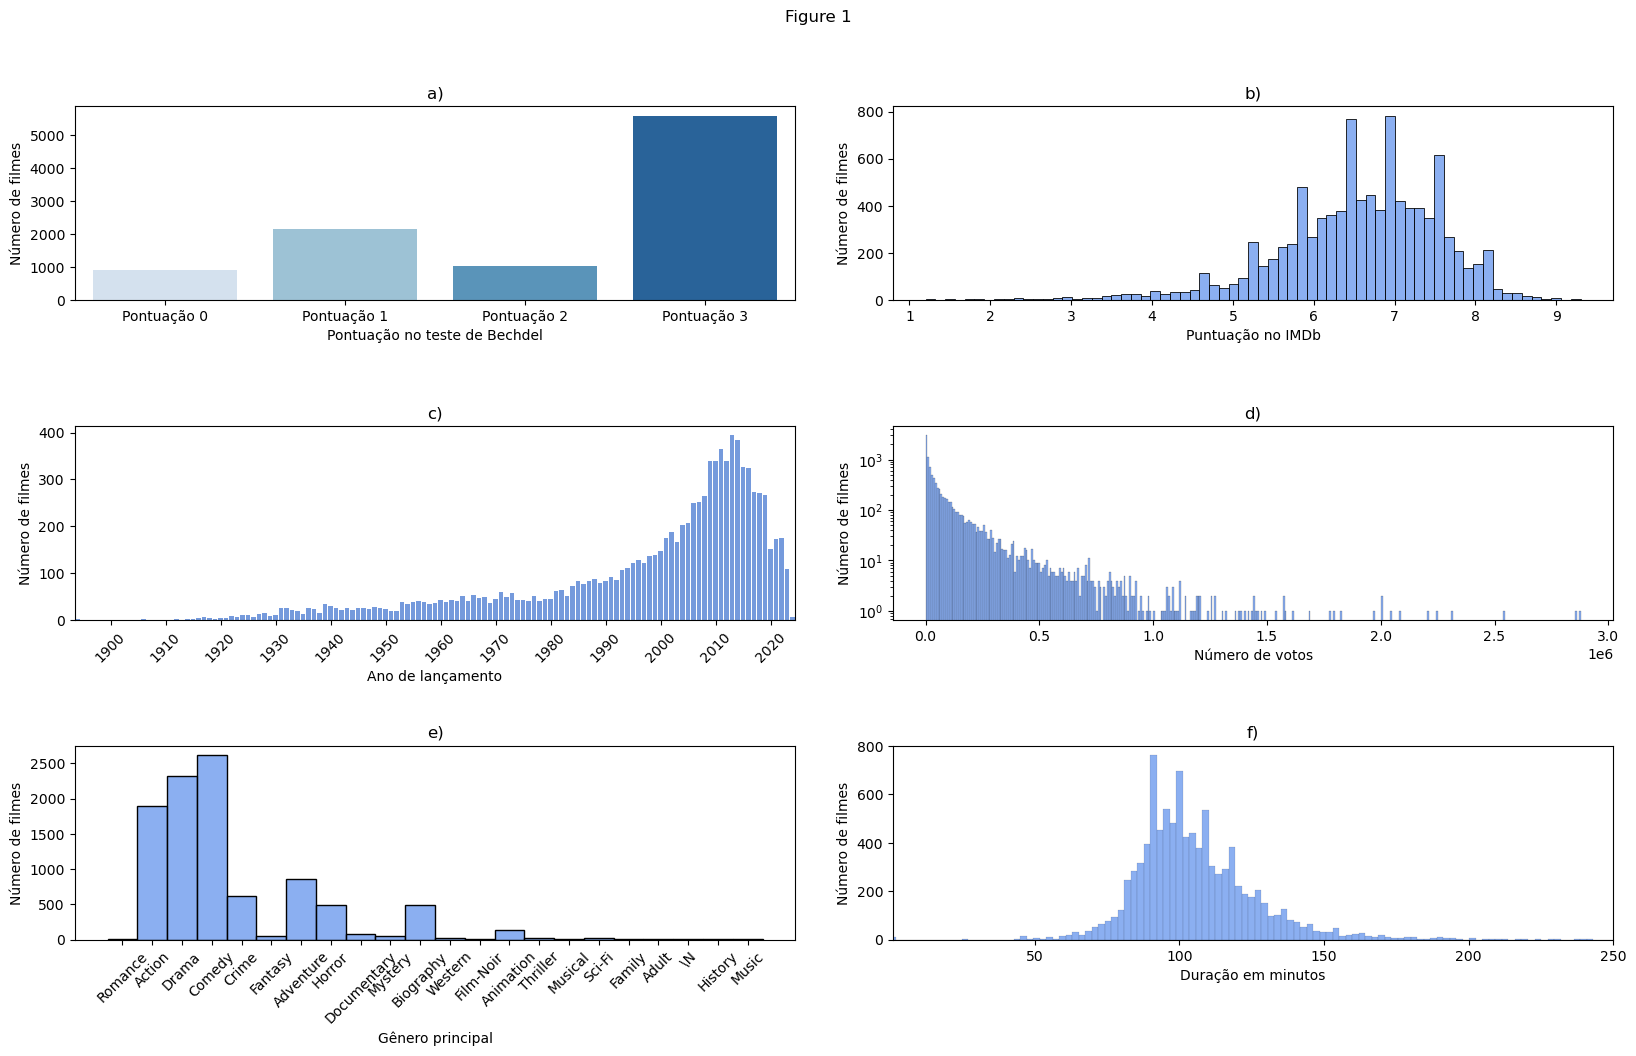

In [9]:
# Criando uma figura e quatro subplot para descrição dos dados
bechdel_pontuacao = df['bechdelRating'].value_counts()

fig, axs = plt.subplots(3, 2, figsize=(17, 11))
plt.suptitle('Figure 1')

# Personalizando rótulos de escala para o eixo x
legenda = ["Pontuação 0", 
           "Pontuação 1", 
           "Pontuação 2", 
           "Pontuação 3"]

# Criação do primeiro subplot: número de filmes por pontuação de Bechdel
sns.barplot(x=bechdel_pontuacao.index, y=bechdel_pontuacao.values, palette='Blues', ax=axs[0, 0])
axs[0, 0].set_xticklabels(legenda)  
axs[0, 0].set_xlabel('Pontuação no teste de Bechdel')
axs[0, 0].set_ylabel('Número de filmes')
axs[0, 0].set_title('a)')

# Criação do segundo subplot: número de filmes por pontuação no IMDB
sns.histplot(df['imdbAverageRating'], color='cornflowerblue', bins='auto', ax=axs[0, 1])
axs[0, 1].set_xlabel('Puntuação no IMDb')
axs[0, 1].set_ylabel('Número de filmes')
axs[0, 1].set_title('b)')

# Criação do terceiro subplot: número de filmes por ano de lançamento
sns.barplot(x='Ano', y='Contagem', data=ano_contagem, color='cornflowerblue', ax=axs[1, 0])
axs[1, 0].set_xlabel('Ano de lançamento')
axs[1, 0].set_ylabel('Número de filmes')
axs[1, 0].set_title('c)')
axs[1, 0].set_xticks(np.arange(6, 130, 10))
axs[1, 0].tick_params(axis='x', rotation=45)

# Criação do auarto subplot: número de filmes por número de votos
sns.histplot(df['numVotes'], bins='auto', color='cornflowerblue', ax=axs[1, 1])
axs[1, 1].set_title('d)')
axs[1, 1].set_xlabel('Número de votos')
axs[1, 1].set_ylabel('Número de filmes')
axs[1, 1].set_yscale('log')

# Criação do quinto subplot: número de filmes por gênero principal
sns.histplot(df['genre1'], bins='auto', color='cornflowerblue', ax=axs[2, 0])
axs[2, 0].set_xlabel('Gênero principal')
axs[2, 0].set_ylabel('Número de filmes')
axs[2, 0].set_title('e)')
axs[2, 0].tick_params(axis='x', rotation=45)

# Criação do sexto subplot: número de filmes por duração em minutos
sns.histplot(df['runtimeMinutes'], bins='auto', color='cornflowerblue', ax=axs[2, 1])
axs[2, 1].set_title('f)')
axs[2, 1].set_xlabel('Duração em minutos')
axs[2, 1].set_ylabel('Número de filmes')
axs[2, 1].set_xlim(1,250)

fig.tight_layout(pad=3.0)

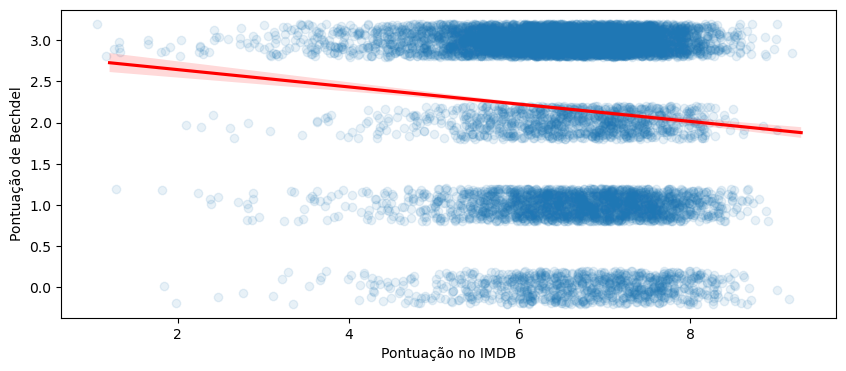

In [10]:
#Criando um gráfico de regressão para a distribuição da pontuação de Bechdel por pontuação do IMDB
fig = plt.figure(figsize=(10, 4))
sns.regplot(x=df['imdbAverageRating'], y=df['bechdelRating'], x_jitter=0.2, y_jitter=0.2, line_kws = {'color':'red'}, scatter_kws={'alpha':0.1})
plt.ylabel("Pontuação de Bechdel")
plt.xlabel("Pontuação no IMDB");

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


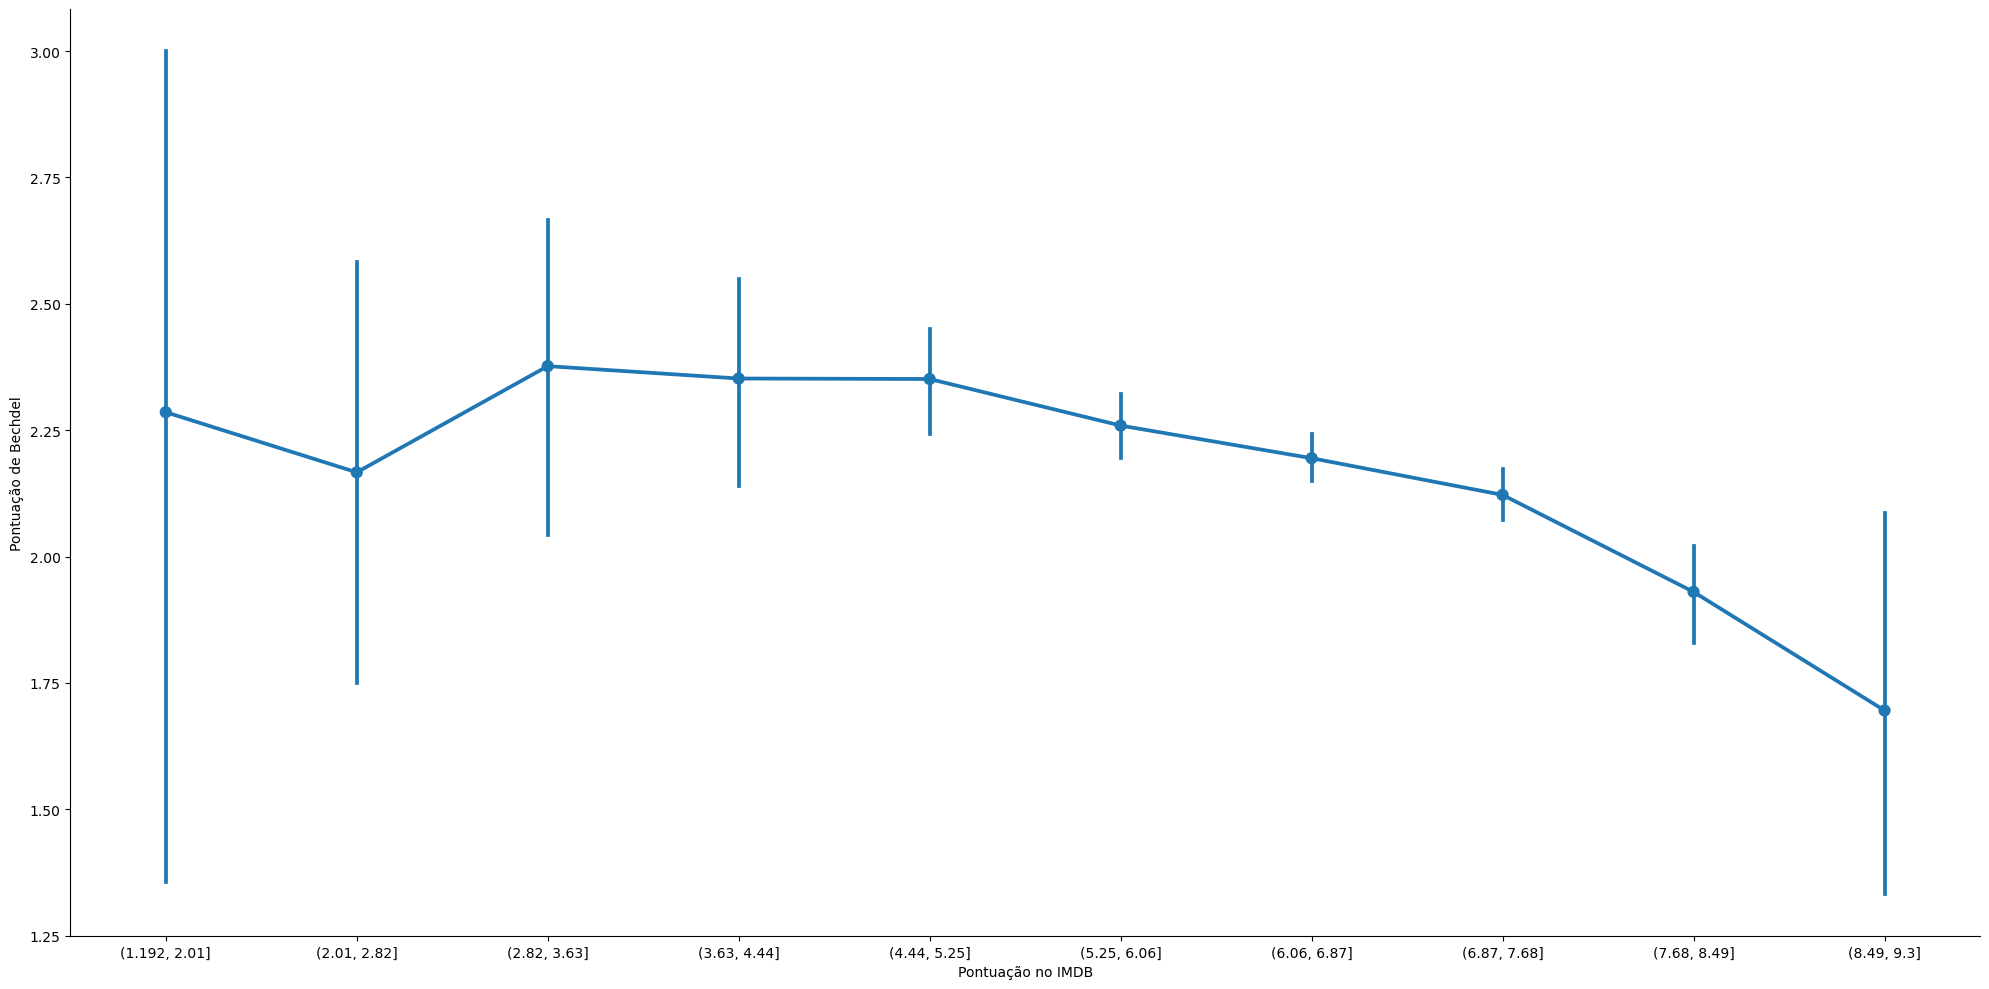

In [11]:
df['mediaimdb'] = pd.cut(df['imdbAverageRating'], 10)
ax = sns.catplot(x='mediaimdb', y='bechdelRating'
                , kind='point'
                , data=df
                , errorbar=('ci', 99)
                , dodge=True
                , height=10
                , aspect=2
               )
plt.xlabel('Pontuação no IMDB')
plt.ylabel('Pontuação de Bechdel');

A partir da análise dos gráficos acima pode-se concluir que na média os filmes com maiores notas no IMDB são os que possuem as menores pontuações de Bechdel, no entanto não há uma diminuição progressiva conforme a nota do IMDB aumenta. Os filmes com nota menor que 2,8 possuem alta variância e tendem a possuir menor pontuação de Bechdel, e a diminuição progressiva da pontuação é destacada a partir de filmes com essa nota.

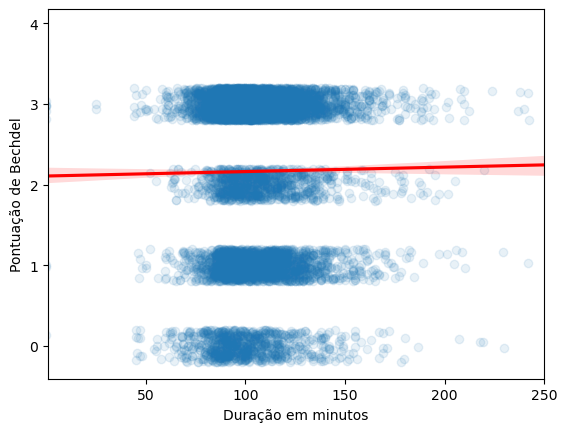

In [12]:
#Criando um gráfico de regressão para a distribuição da pontuação de Bechdel por duração em minutos
fig, ax = plt.subplots()
sns.regplot(x=df['runtimeMinutes'], y=df['bechdelRating'], x_jitter=0.2, y_jitter=0.2, line_kws = {'color':'red'}, scatter_kws={'alpha':0.1})
plt.ylabel("Pontuação de Bechdel")
plt.xlabel("Duração em minutos")
ax.set_xlim(1,250);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(9.444444444444445, 0.5, 'Pontuação de Bechdel')

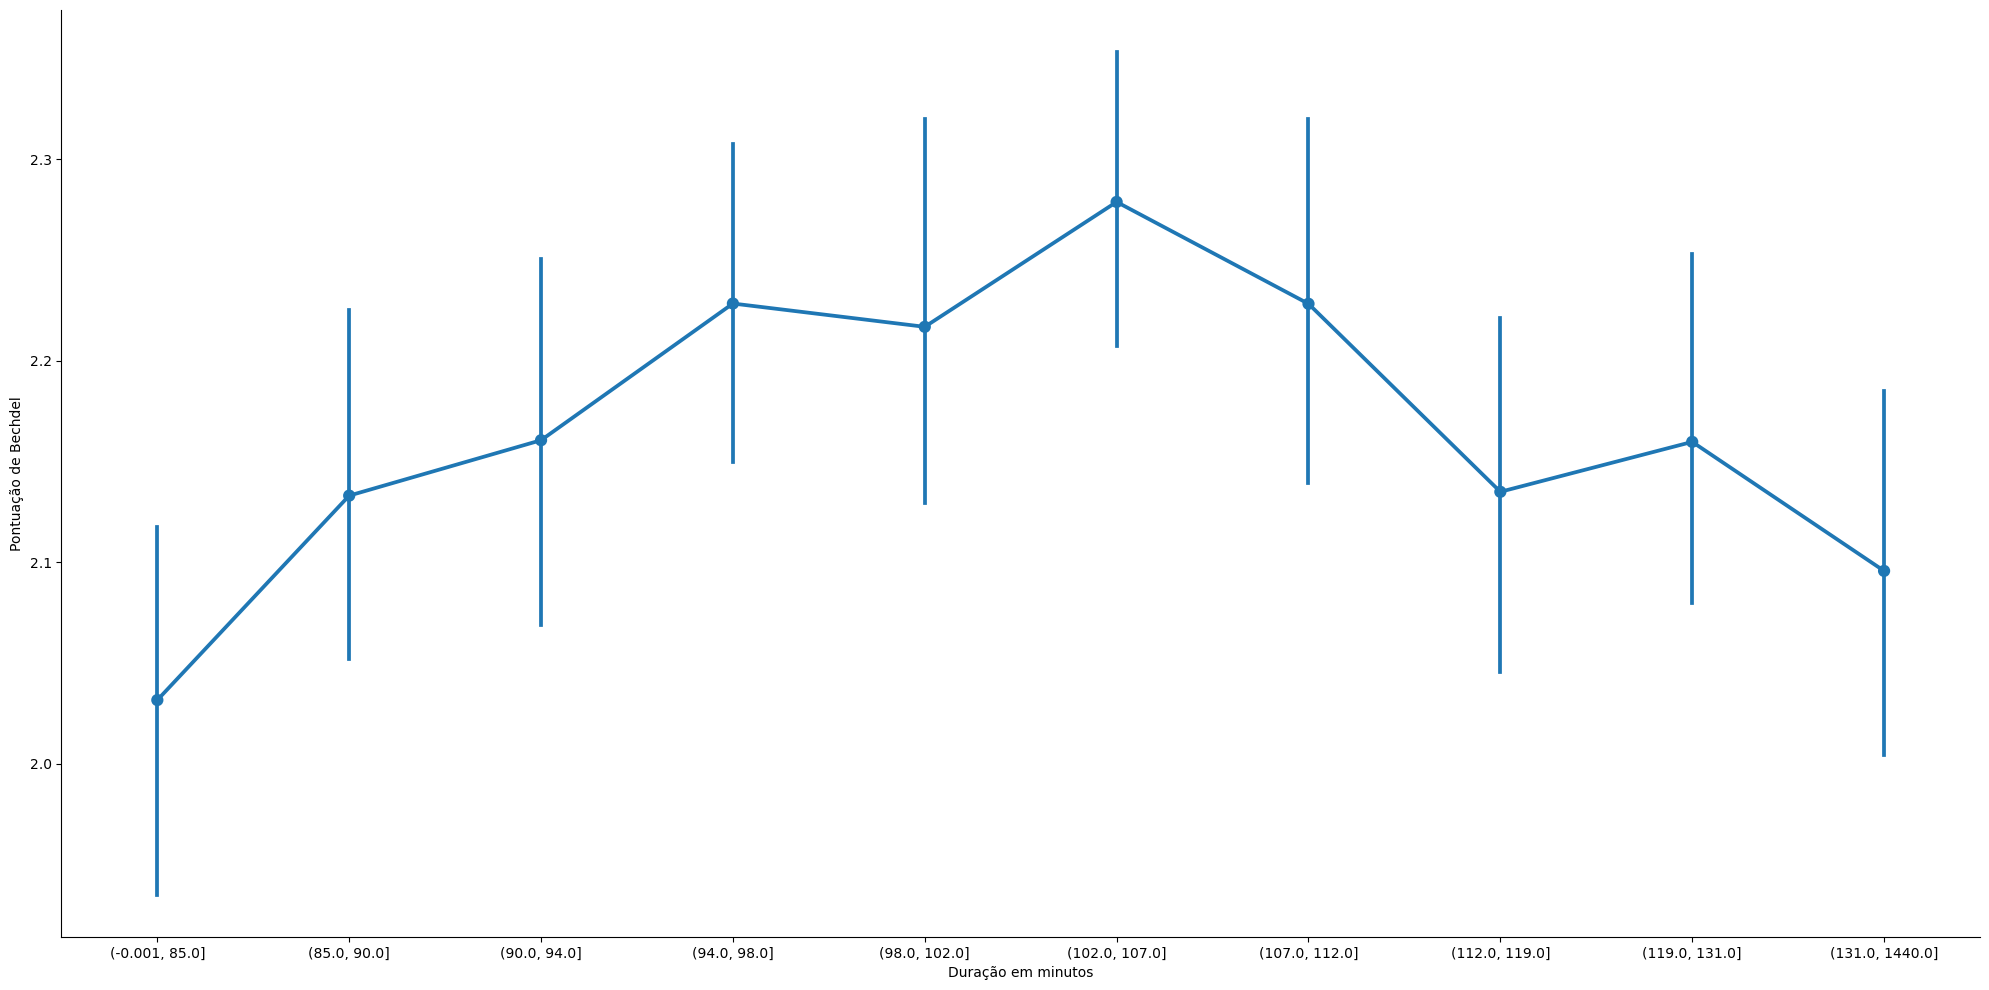

In [13]:
df['duracao'] = pd.qcut(df['runtimeMinutes'], 10)
ax = sns.catplot(x='duracao', y='bechdelRating'
                , kind='point'
                , data=df
                , errorbar=('ci', 99)
                , dodge=True
                , height=10
                , aspect=2
               )
plt.xlabel('Duração em minutos')
plt.ylabel('Pontuação de Bechdel')

A partir da análise dos gráficos acima pode-se concluir que no geral os filmes com duração entre 100 e 110 minutos tendem a ter uma pontuação de Bechdel maior.

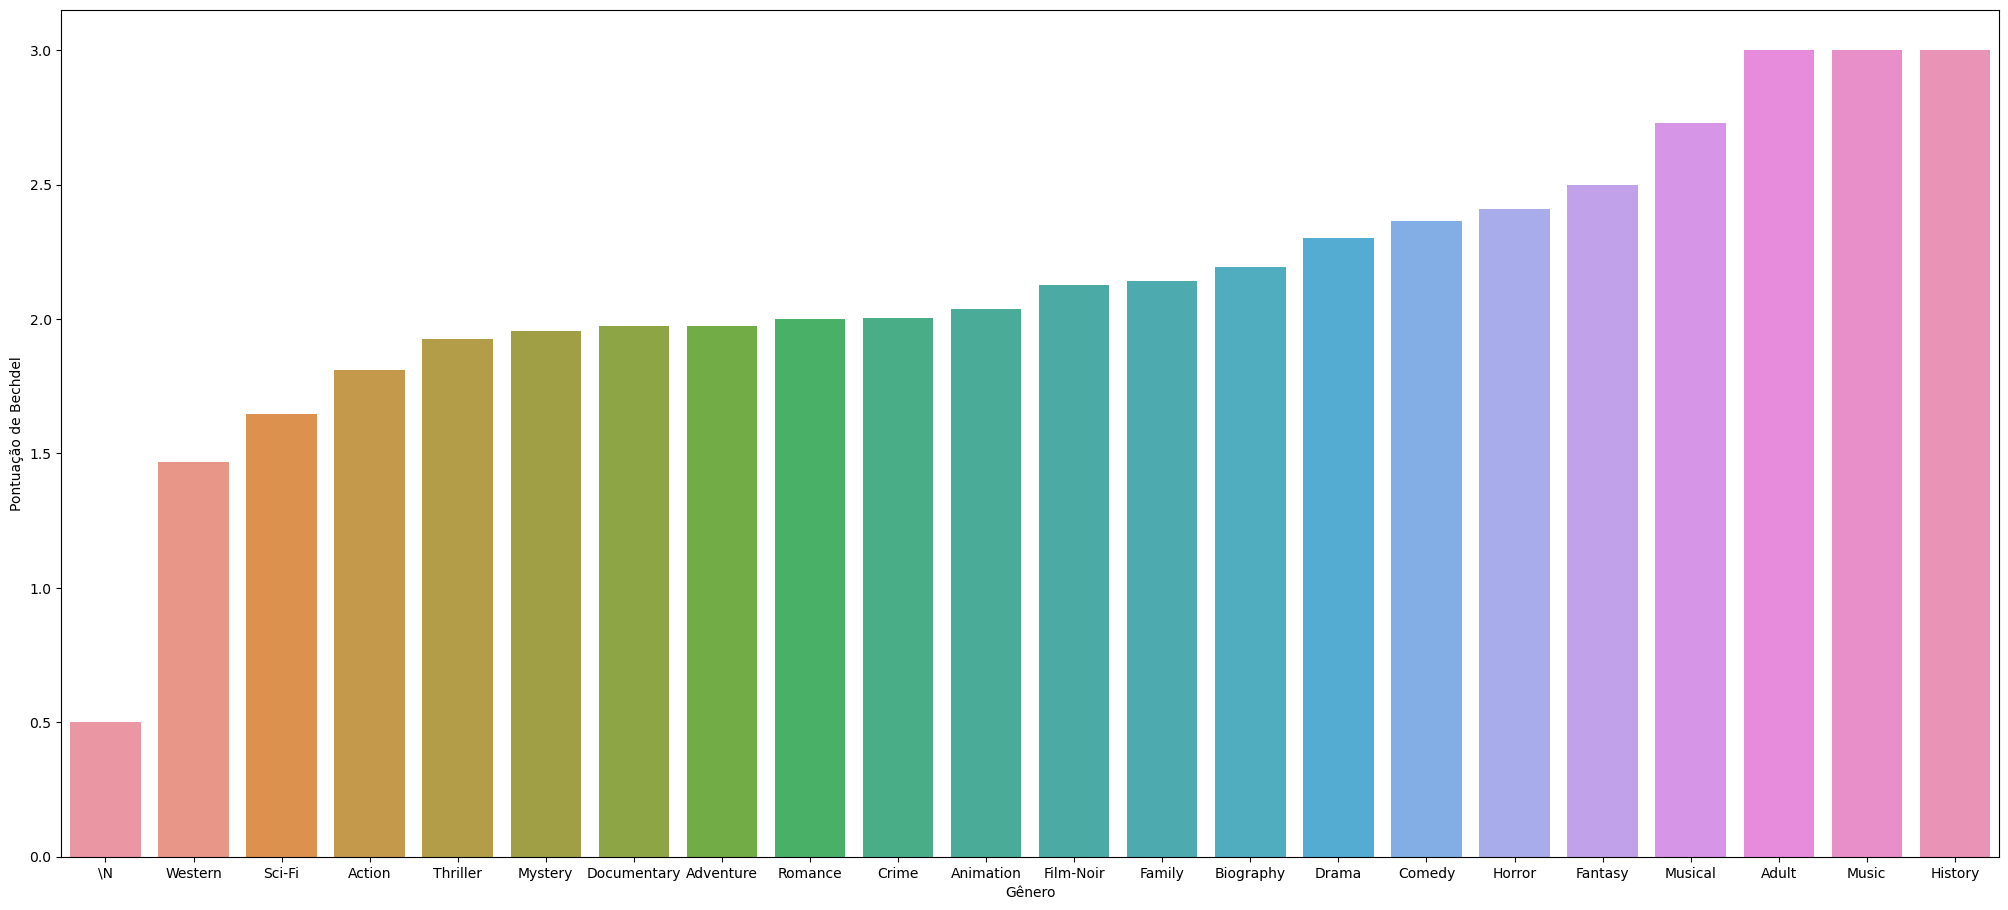

In [14]:
#Criando um gráfico para a distribuição da pontuação de Bechdel por gênero
fig, ax = plt.subplots(figsize=(25, 11))
media_bechdel_por_genero = df.groupby('genre1')[['bechdelRating']].mean()
sns.barplot(x=media_bechdel_por_genero.index, y=media_bechdel_por_genero['bechdelRating'], order=media_bechdel_por_genero.sort_values('bechdelRating').index) 
ax.set_xlabel('Gênero')
ax.set_ylabel('Pontuação de Bechdel');

A partir da análise do gráfico acima pode-se concluir que os gêneros de ficcção científica (Sci-Fi) e velho oeste (Western) são os que possuem as menores pontuações de Bechdel. Um ponto curioso é que os filmes de Romance possuem no geral uma pontuação de Bechdel menor que filmes de terror e comédia, por exemplo.

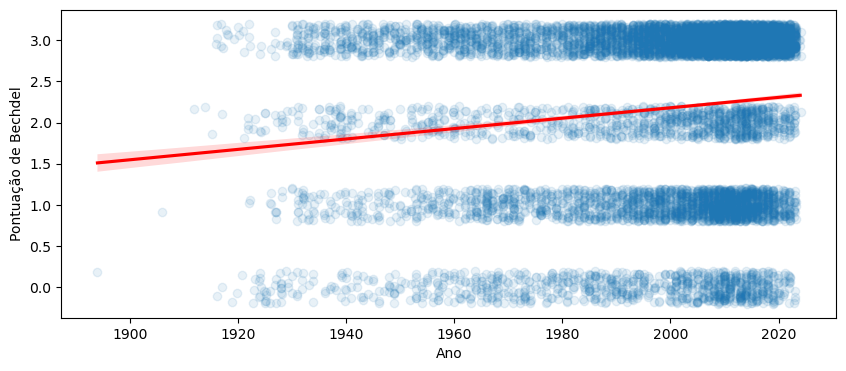

In [15]:
#Criando um gráfico de regressão para a distribuição da pontuação de Bechdel por ano
fig = plt.figure(figsize=(10, 4))
sns.regplot(x=df['year'], y=df['bechdelRating'], x_jitter=0.2, y_jitter=0.2, line_kws = {'color':'red'}, scatter_kws={'alpha':0.1})
plt.ylabel("Pontuação de Bechdel")
plt.xlabel("Ano");

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


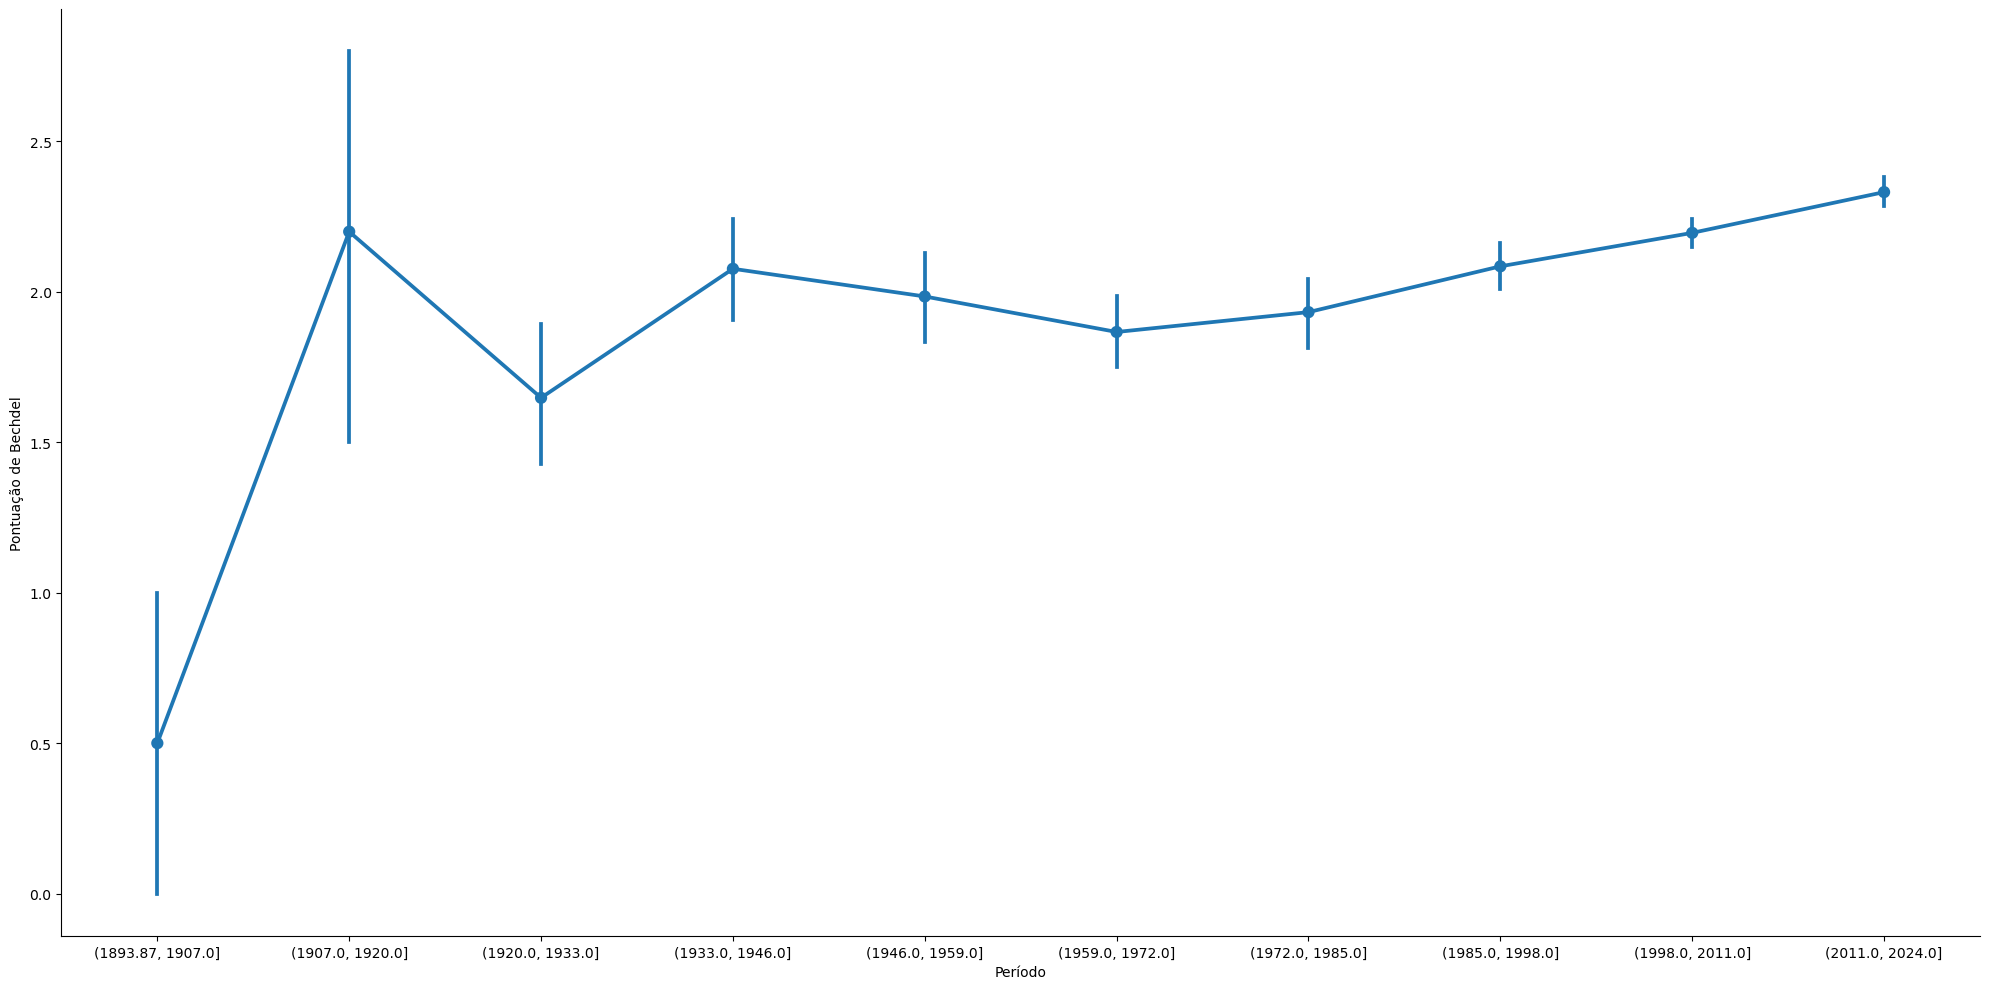

In [16]:
#Criando um gráfico para a distribuição da pontuação de Bechdel por período
#fig, ax = plt.subplots(figsize=(20, 11))
df['periodo'] = pd.cut(df['year'], 10)
#media_bechdel_por_ano = df.groupby('periodo')[['bechdelRating']].mean()
ax = sns.catplot(x='periodo', y='bechdelRating'
                , kind='point'
                , data=df
                , errorbar=('ci', 99)
                , dodge=True
                , height=10
                , aspect=2
               )
plt.xlabel('Período')
plt.ylabel('Pontuação de Bechdel');
#sns.barplot(x=media_bechdel_por_ano.index, y=media_bechdel_por_ano['bechdelRating']) 
#ax.set_xlabel('Período')
#ax.set_ylabel('Pontuação de Bechdel');

A partir da análise dos gráficos acima pode-se concluir que na média os filmes mais antigos (antes de 1907) são os que possuem as menores pontuações de Bechdel, no entanto não há um aumento progressivo ao longo do tempo desde esse período. Embora entre 1907 e 1920 houve um aumento considerável, nos períodos seguintes existiram aumentos e quedas na pontuação média, e apenas a partir de entorno da década de 60 que houve um aumento progressivo ao longo do tempo (sem diminuições), inclusive com diminuição da variância dos dados, indicando que nos anos futuros a tendência é de aumento desse índice.

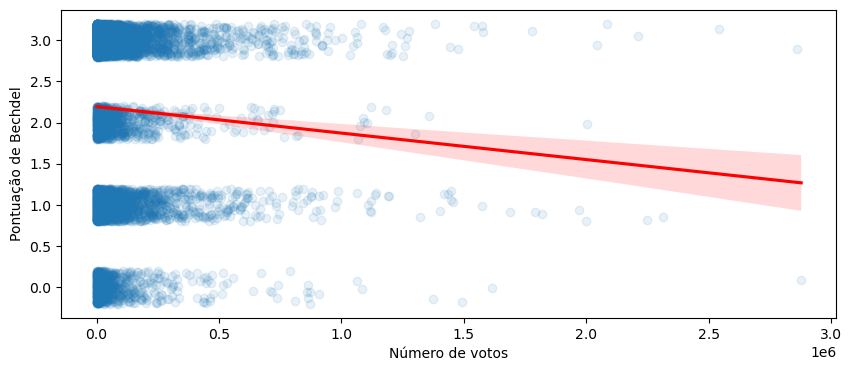

In [17]:
#Criando um gráfico de regressão para a distribuição da pontuação de Bechdel por número de votos
fig = plt.figure(figsize=(10, 4))
sns.regplot(x=df['numVotes'], y=df['bechdelRating'], x_jitter=0.2, y_jitter=0.2, line_kws = {'color':'red'}, scatter_kws={'alpha':0.1})
plt.ylabel("Pontuação de Bechdel")
plt.xlabel("Número de votos");

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


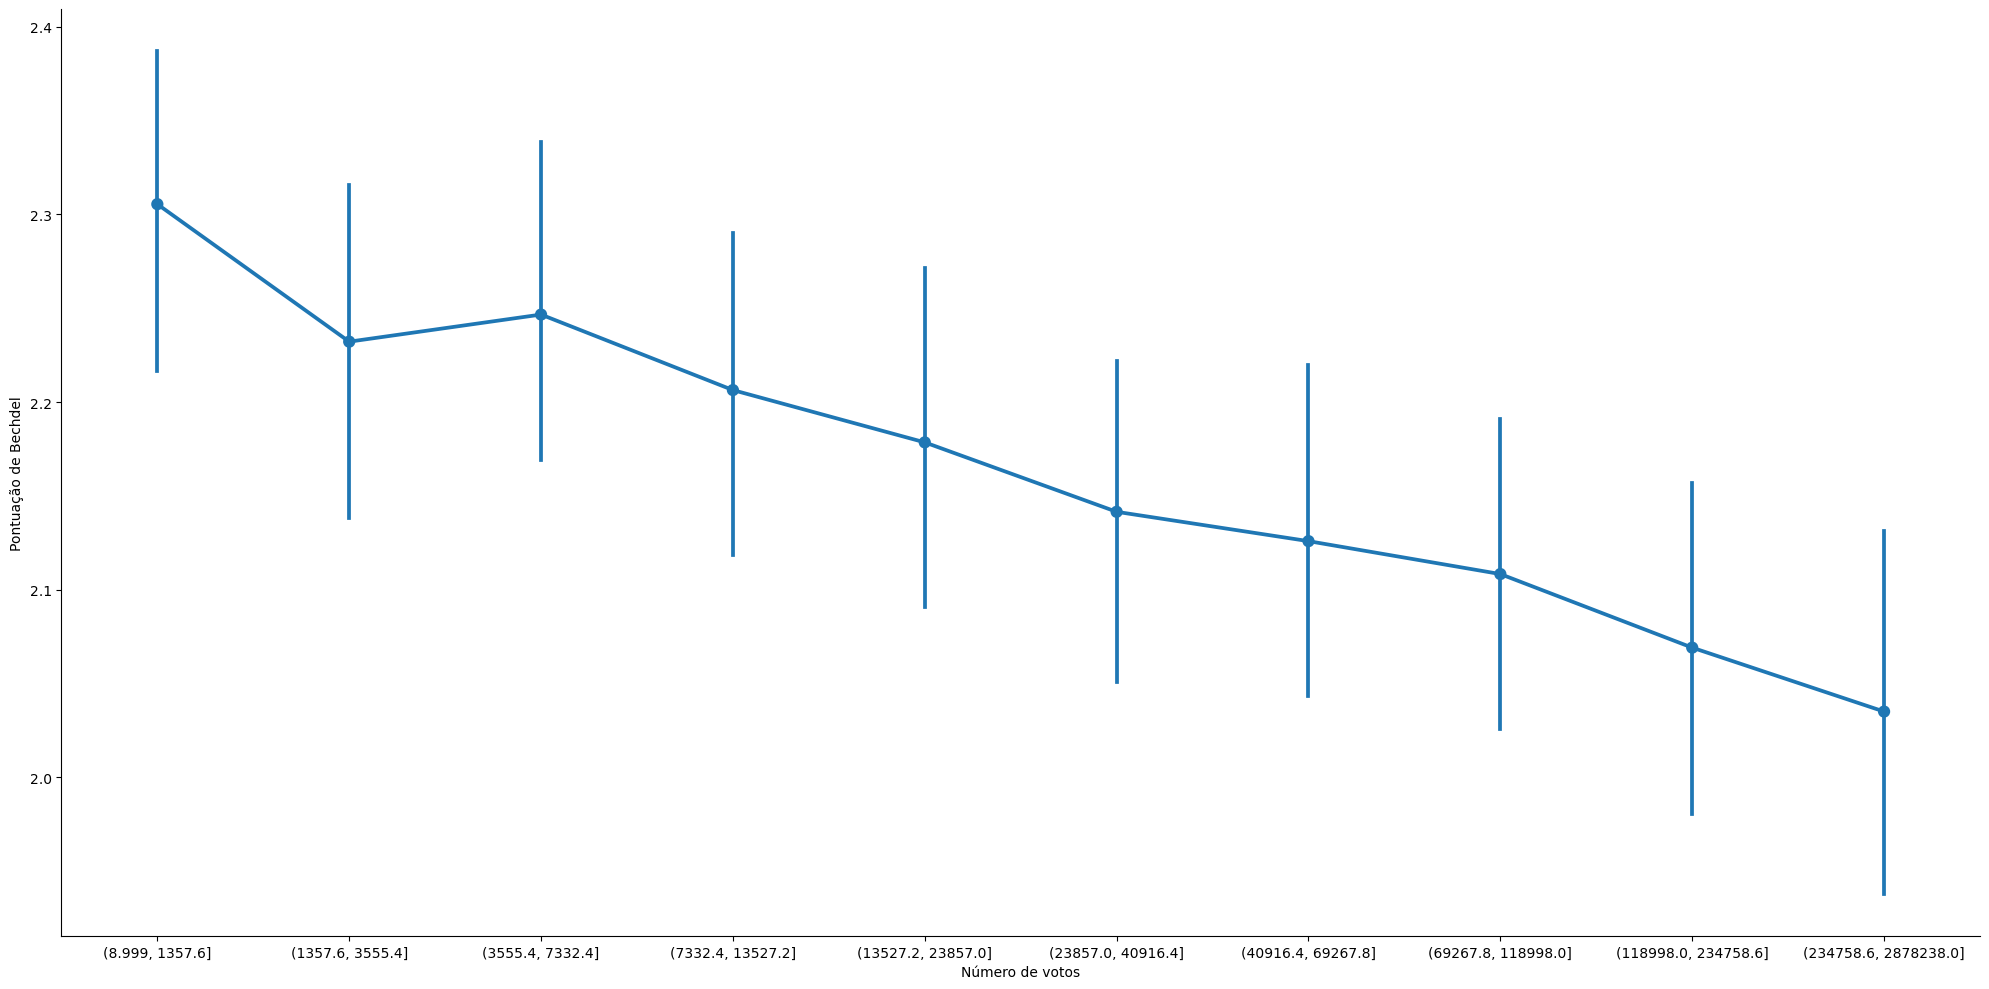

In [18]:
df['numvotos'] = pd.qcut(df['numVotes'], 10)
ax = sns.catplot(x='numvotos', y='bechdelRating'
                , kind='point'
                , data=df
                , errorbar=('ci', 99)
                , dodge=True
                , height=10
                , aspect=2
               )
plt.xlabel('Número de votos')
plt.ylabel('Pontuação de Bechdel');

A partir da análise dos gráficos acima pode-se concluir que no geral quanto maior o número de votos dos filme, menor a pontuação de Bechdel.

## 6. Execução de um modelo preditivo

In [19]:
#Criação de uma regressão linear
X = df[['year', 'numVotes', 'runtimeMinutes', 'imdbAverageRating']]
X_train, X_test, y_train, y_test = train_test_split(X, df['bechdelRating'],test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.02560982433504555


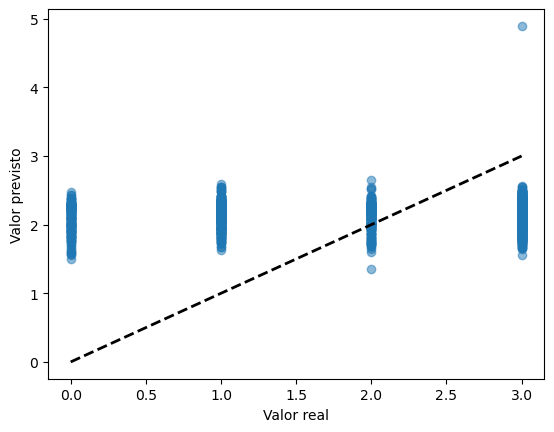

In [20]:
# Plotar a distribuição das previsões e valores reais
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor previsto');

Pode-se verificar pelo r2 que o modelo não é adequado. Isso de deve ao fato de que não há uma relação linear clara entre a variável de interesse e as demais utilizadas, como se pode observar nas análises anteriores. Possíveis melhoras no modelo seriam a criação de variáveis dummy para o gênero, por exemplo, e formas funcionais das variáveis utilizadas, como a adicão do quadrado da duração do filme.